In [73]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import plotly.express as px
import seaborn as sns
import os
from datetime import datetime
from importlib import reload
import functions
reload(functions)

<module 'functions' from '/home/elmunoz42/aimlbootcamp/aimlbootcamp/universal-analytics-data/functions.py'>

In [74]:
# Cosolidate the Data into a pages CSV file with all quarters.
try:
    df = functions.build_ua_pages_dataframe('hsh/Pages/', 'pages')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/hsh/Pages/Analytics All Web Site Data Pages 20201001-20201231.csv
Successfully processed Analytics All Web Site Data Pages 20201001-20201231.csv
Processing file: data/hsh/Pages/Analytics All Web Site Data Pages 20190701-20190930.csv
Successfully processed Analytics All Web Site Data Pages 20190701-20190930.csv
Processing file: data/hsh/Pages/Analytics All Web Site Data Pages 20200101-20200331.csv
Successfully processed Analytics All Web Site Data Pages 20200101-20200331.csv
Processing file: data/hsh/Pages/Analytics All Web Site Data Pages 20210401-20210630.csv
Successfully processed Analytics All Web Site Data Pages 20210401-20210630.csv
Processing file: data/hsh/Pages/Analytics All Web Site Data Pages 20200401-20200630.csv
Successfully processed Analytics All Web Site Data Pages 20200401-20200630.csv
Processing file: data/hsh/Pages/Analytics All Web Site Data Pages 20200701-20200930.csv
Successfully processed Analytics All Web Site Data Pages 20200701-20200930.cs

In [75]:
# Read the CSV file
df = pd.read_csv('output/hsh/Pages/consolidated-pages.csv')
# Display the DataFrame
print(df.head())

                                  Page Pageviews  Unique Pageviews  \
0                                    /     3,155            2655.0   
1                           /our-team/     2,388            1503.0   
2                            /contact/       640             557.0   
3              /clinic-info/insurance/       396             321.0   
4  /team/eliza-hofkosh-hulbert-nd-lac/       381             299.0   

  Avg. Time on Page  Entrances  Bounce Rate  % Exit Page Value  Year Quarter  
0          00:00:54     2524.0       0.4175  41.49%      $0.00  2020      Q4  
1          00:00:53      271.0       0.4375  22.70%      $0.00  2020      Q4  
2          00:02:33      103.0       0.5789  57.50%      $0.00  2020      Q4  
3          00:01:46       57.0       0.6667  33.33%      $0.00  2020      Q4  
4          00:02:14      111.0       0.6847  40.94%      $0.00  2020      Q4  


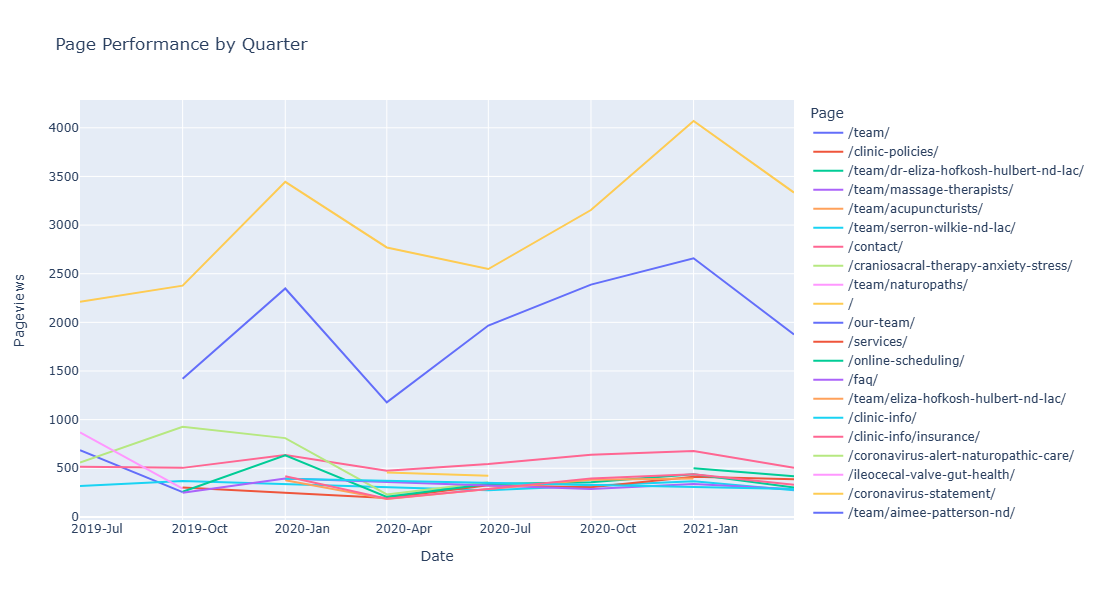

In [76]:
# Read the CSV file
df = pd.read_csv('output/hsh/Pages/consolidated-pages.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df['Pageviews'] = pd.to_numeric(df['Pageviews'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total and other excludes
exclude_list = ["total"]
fig = px.line(df.query('Page not in @exclude_list'), x='Date', y='Pageviews', color='Page', title='Page Performance by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/hsh/hsh-page-performance.html')

In [77]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('hsh/Sources/', 'sources')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/hsh/Sources/Analytics All Web Site Data All Traffic 20191001-20191231.csv
Successfully processed Analytics All Web Site Data All Traffic 20191001-20191231.csv
Processing file: data/hsh/Sources/Analytics All Web Site Data All Traffic 20210101-20210331.csv
Successfully processed Analytics All Web Site Data All Traffic 20210101-20210331.csv
Processing file: data/hsh/Sources/Analytics All Web Site Data All Traffic 20190701-20190930.csv
Successfully processed Analytics All Web Site Data All Traffic 20190701-20190930.csv
Processing file: data/hsh/Sources/Analytics All Web Site Data All Traffic 20200701-20200930.csv
Successfully processed Analytics All Web Site Data All Traffic 20200701-20200930.csv
Processing file: data/hsh/Sources/Analytics All Web Site Data All Traffic 20210401-20210630.csv
Successfully processed Analytics All Web Site Data All Traffic 20210401-20210630.csv
Processing file: data/hsh/Sources/Analytics All Web Site Data All Traffic 20201001-20201231.csv

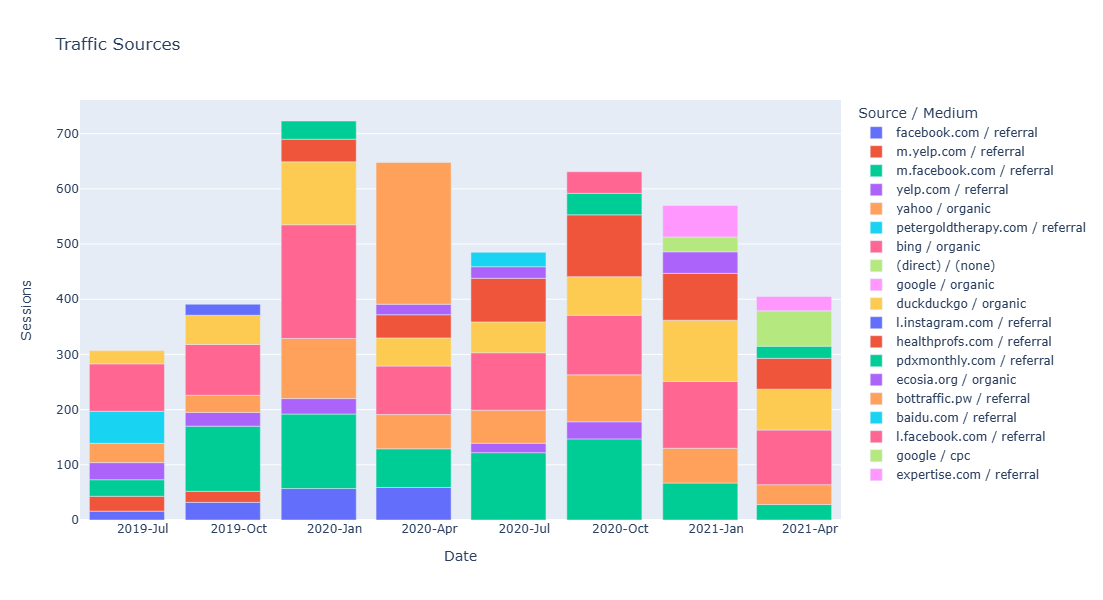

In [79]:

# Read the CSV file
df = pd.read_csv('output/hsh/Sources/consolidated-sources.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total and other excludes
exclude_list = ["total"]
fig = px.bar(df.query('`Source / Medium` not in @exclude_list'), x='Date', y='Sessions', color='Source / Medium', title='Traffic Sources')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/hsh/hsh-sources-mediums.html')

In [23]:
# Convert 'Date' from date time to date type
# df['Date'] = df['Date'].dt.date

# # Assuming df is your DataFrame and it has columns 'Date' and 'Pageviews'
# quarters = df['Date'].unique()
# # Update the layout

# for quarter in quarters:
#     df_quarter = df[df['Date'] == quarter]
#     fig = px.pie(df_quarter, values='Users', names='Source / Medium', title=f'Pie Chart for Quarter {quarter}')
#     fig.update_layout(
#         autosize=False,
#         width=600,  # Width of the figure in pixels
#         height=600  # Height of the figure in pixels
#     )
#     fig.show()

In [80]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('hsh/Landing Pages/', 'landing-pages')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/hsh/Landing Pages/Analytics All Web Site Data Landing Pages 20200101-20200331.csv
Successfully processed Analytics All Web Site Data Landing Pages 20200101-20200331.csv
Processing file: data/hsh/Landing Pages/Analytics All Web Site Data Landing Pages 20191001-20191231.csv
Successfully processed Analytics All Web Site Data Landing Pages 20191001-20191231.csv
Processing file: data/hsh/Landing Pages/Analytics All Web Site Data Landing Pages 20200701-20200930.csv
Successfully processed Analytics All Web Site Data Landing Pages 20200701-20200930.csv
Processing file: data/hsh/Landing Pages/Analytics All Web Site Data Landing Pages 20201001-20201231.csv
Successfully processed Analytics All Web Site Data Landing Pages 20201001-20201231.csv
Processing file: data/hsh/Landing Pages/Analytics All Web Site Data Landing Pages 20200401-20200630.csv
Successfully processed Analytics All Web Site Data Landing Pages 20200401-20200630.csv
Processing file: data/hsh/Landing Pages/Analy

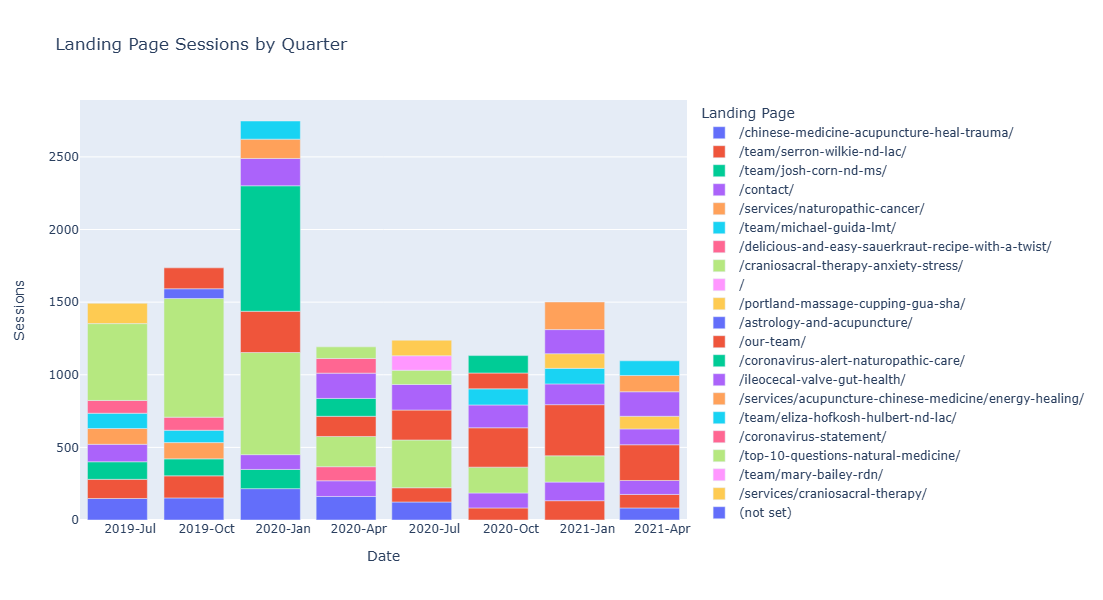

In [81]:
# Read the CSV file
df = pd.read_csv('output/hsh/Landing Pages/consolidated-landing-pages.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total
exclude_list = ["total"]
fig = px.bar(df.query('`Landing Page` not in @exclude_list'), x='Date', y='Sessions', color='Landing Page', title='Landing Page Sessions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/hsh/hsh-landing-pages.html')

In [82]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('hsh/Events or Conversions', 'goal-urls')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/hsh/Events or Conversions/Analytics All Web Site Data Goal URLs 20190701-20190930.csv
Successfully processed Analytics All Web Site Data Goal URLs 20190701-20190930.csv
Processing file: data/hsh/Events or Conversions/Analytics All Web Site Data Goal URLs 20210101-20210331.csv
Successfully processed Analytics All Web Site Data Goal URLs 20210101-20210331.csv
Processing file: data/hsh/Events or Conversions/Analytics All Web Site Data Goal URLs 20200101-20200331.csv
Successfully processed Analytics All Web Site Data Goal URLs 20200101-20200331.csv
Processing file: data/hsh/Events or Conversions/Analytics All Web Site Data Goal URLs 20210401-20210630.csv
Successfully processed Analytics All Web Site Data Goal URLs 20210401-20210630.csv
Processing file: data/hsh/Events or Conversions/Analytics All Web Site Data Goal URLs 20191001-20191231.csv
Successfully processed Analytics All Web Site Data Goal URLs 20191001-20191231.csv
Processing file: data/hsh/Events or Conversio

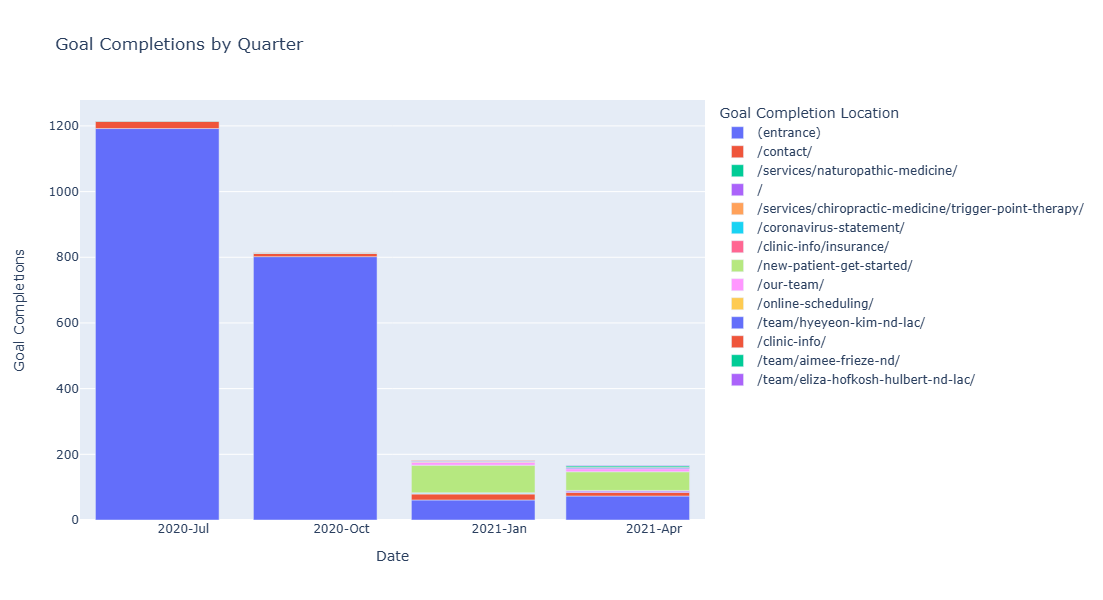

In [86]:
# GOAL URLS / CONVERSIONS  
# Read the CSV file
df = pd.read_csv('output/hsh/Events or Conversions/consolidated-goal-urls.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df['Goal Completions'] = pd.to_numeric(df['Goal Completions'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with the goals completion locations that exist
include_list = [
    '/',
    '/team/aimee-frieze-nd/',
    '/services/chiropractic-medicine/trigger-point-therapy/',
    '/our-team/',
    '/team/eliza-hofkosh-hulbert-nd-lac/',
    '/contact/',
    '/team/hyeyeon-kim-nd-lac/',
    '/clinic-info/',
    '/services/naturopathic-medicine/',
    '/new-patient-get-started/',
    '/online-scheduling/',
    '/coronavirus-statement/',
    '(entrance)',
    '/clinic-info/insurance/'
]
fig = px.bar(df.query('`Goal Completion Location` in @include_list'), x='Date', y='Goal Completions', color='Goal Completion Location', title='Goal Completions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
# fig.write_html('output/hsh/hsh-goal-urls.html')

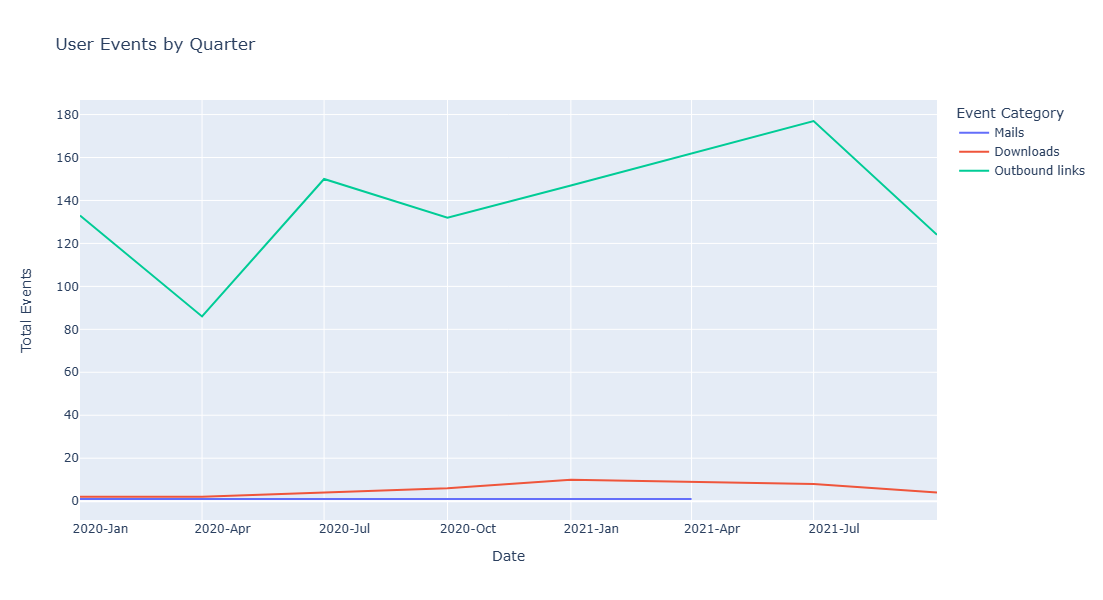

In [53]:
# EVENTS 
# Read the CSV file
df = pd.read_csv('output/hsh/Events or Conversions/consolidated-events.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
# df['Total Events'] = pd.to_numeric(df['Total Events'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with the goals completion locations that exist
include_list = ["Mails", "Downloads", "Outbound links"]
fig = px.line(df.query('`Event Category` in @include_list'), x='Date', y='Total Events', color='Event Category', title='User Events by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1000,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/hsh/hsh-events.html')